In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import log,dot,exp,shape
import pandas as pd
import seaborn as sns

#### Accuracy and Hypothesis Functions

In [2]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

def polynomialFeatures(X):
    m,n = X.shape
    X_poly = np.zeros((m,n*(n+1)//2))
    col = 0
    for i in range(n):
        for j in range(i+1):
            X_poly[:,col] = X[:,i]*X[:,j]
            col += 1
    return X_poly

#### Logistic Regression Code

In [3]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

class LogisticRegression:
    def sigmoid(self,z):
        sig = 1/(1+np.exp(-z))
        return sig
    
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    
    def fit(self,X,y,alpha=0.01,iter=1000):
        weights,X = self.initialize(X)
        def loss_function(theta):
            z = dot(X,theta)
            loss_func_0 = y.T.dot(log(self.sigmoid(z)))
            loss_func_1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            loss_func = -((loss_func_1 + loss_func_0))/len(y)
            return loss_func
        list_loss_func = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            list_loss_func[i] = loss_function(weights)
        self.weights = weights
        return list_loss_func
    def predict(self,X):
        z = np.dot(self.initialize(X)[1],self.weights)
        #probs = self.sigmoid(z)
        lis = []
        for i in self.sigmoid(z):
            if i>=0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
    
    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        z = np.dot(X, self.weights)
        probs = self.sigmoid(z)
        return np.column_stack((1-probs, probs))


#### Toy Data

In [4]:
X = np.asarray([[0.50], [0.75], [1.00], [1.25], [1.50],[1.75], [1.75], 
                [2.00], [2.25], [2.50], [2.75],[3.00], [3.25], [3.50], 
                [4.00], [4.25], [4.50],[4.75], [5.00], [5.50]])
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0,1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

#### Implememtation of logistic Regression

 The model explains 0.8 chance and Converges after some number of Iterations


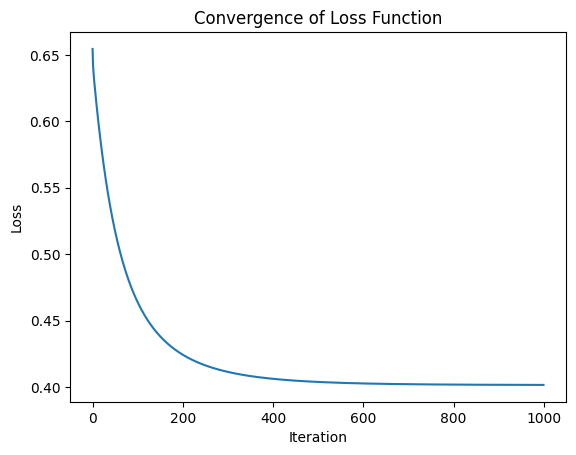

In [5]:
logreg = LogisticRegression()
loss_func= logreg.fit(X,y)
y_pred= logreg.predict(X)
print(f" The model explains {accuracy(y_pred,y)} chance and Converges after some number of Iterations")
plt.plot(loss_func)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Convergence of Loss Function")
plt.show()

#### Load csv data with copy as a pandas Dataframe

In [6]:
from google.colab import files
uploades = files.upload()
data=np.loadtxt('cwbdata.csv',delimiter=',')
pd_data=pd.DataFrame(data)
pd_data.columns=['X','Y','Z']

print(pd_data.info())
print(pd_data.describe())

Saving cwbdata.csv to cwbdata.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       118 non-null    float64
 1   Y       118 non-null    float64
 2   Z       118 non-null    float64
dtypes: float64(3)
memory usage: 2.9 KB
None
                X           Y           Z
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646563    1.000000
max      1.070900    1.108900    1.000000


#### Exploratory analysis

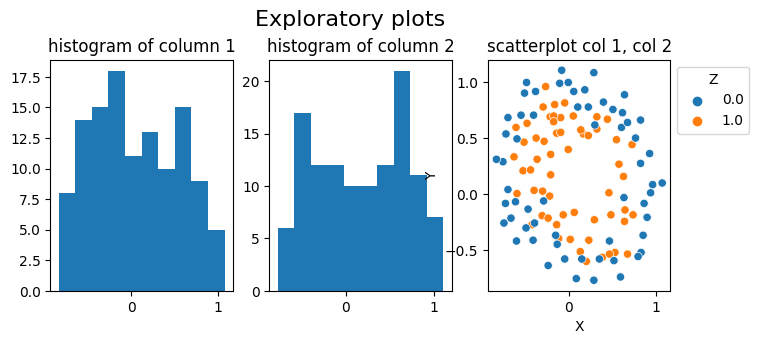

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(8,3))
plt.suptitle('Exploratory plots', size=16, va='bottom')
print(" ")
axs[0].hist(pd_data['X'])
axs[0].set_title('histogram of column 1')
axs[1].hist(pd_data['Y'])
axs[1].set_title('histogram of column 2')
sc=sns.scatterplot(data=pd_data,x='X',y='Y',hue='Z')
sns.move_legend(sc, "upper left", bbox_to_anchor=(1, 1))
axs[2].set_title('scatterplot col 1, col 2')
plt.show()

#### Shuffle Data and Implement Logistic Regression

In [9]:
X1,y1 = data[:,:2],data[:,-1]
indices = np.arange(len(data))
# shuffle indices
np.random.shuffle(indices)
# use shuffled indices to shuffle data and labels
X_new = X1[indices]
y_new = y1[indices]

model = LogisticRegression()
model.fit(X_new,y_new)
y_pred= model.predict(X_new)
probs = model.predict_proba(X_new)
print(f" The model explains {accuracy(y_pred,y_new)} chance")

 The model explains 0.5508474576271186 chance


#### Plotting the decision boundary

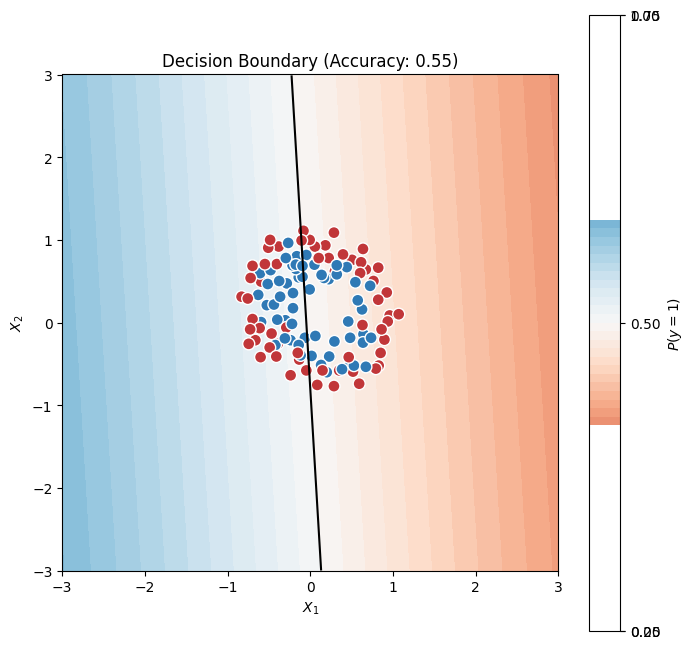

In [10]:
def print_dec_boundary(model, X_test,y_test):
    xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    preds = model.predict(X_test)
    acc = accuracy(y_test, preds)
    
    f, ax = plt.subplots(figsize=(8, 8))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])
    ax.scatter(X_test[:,0], X_test[:, 1], c=y_test[:], s=75, cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
    
    # Plot the decision boundary
    ax.contour(xx, yy, probs, levels=[0.5], colors='k')

    ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3),
           xlabel="$X_1$", ylabel="$X_2$",
           title=f"Decision Boundary (Accuracy: {acc:.2f})")

print_dec_boundary(model,X_new,y_new)

#### Implementing Hypothesis function to Transform Features Appropriately 

In [11]:
X_poly = polynomialFeatures(X_new)
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

model1 = LogisticRegression()
model1.fit(X_poly,y_new)
y_pred= model1.predict(X_poly)
probs = model1.predict_proba(X_poly)
print(f" The model explains {accuracy(y_pred,y_new)} chance after transforming the features")

 The model explains 0.7288135593220338 chance after transforming the features


#### Plotting the decision boundary

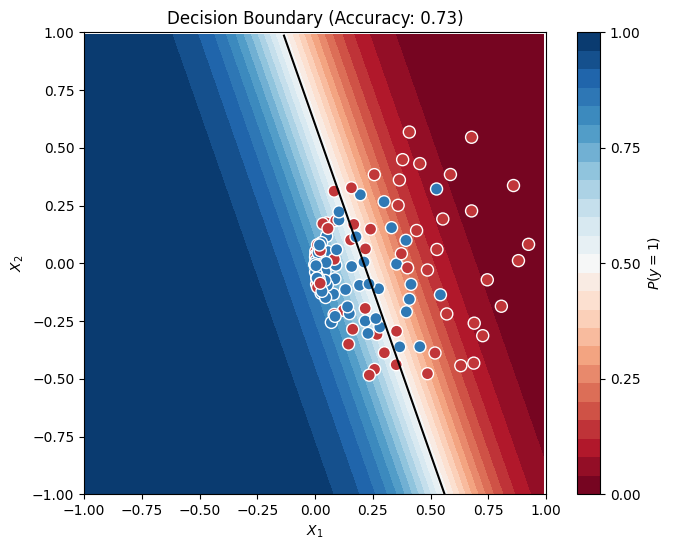

In [12]:
def print_trans_dec_boundary(model1, X_test, y_test):
    # Create grid for contour plot using first two columns of X_test
    xx, yy = np.mgrid[-1:1:.01, -1:1:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Fix the third column at the mean of the third column in X_test
    third_col_mean = np.mean(X_test[:, 2])
    fixed_col = np.full_like(xx, third_col_mean)
    grid_3d = np.c_[grid, fixed_col.ravel()]
    
    # Predict probabilities on the grid and reshape for contour plot
    probs = model1.predict_proba(grid_3d)[:, 1].reshape(xx.shape)
    
    # Make predictions on test data and calculate accuracy
    preds = model1.predict(X_test)
    acc = accuracy(y_test, preds)
    
    # Create plot
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])
    
    # Plot test data points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test[:], s=75, cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
    
    # Plot the decision boundary at the fixed third column value
    ax.contour(xx, yy, probs, levels=[0.5], colors='k')

    ax.set(aspect="equal", xlim=(-1, 1), ylim=(-1, 1),
           xlabel="$X_1$", ylabel="$X_2$",
           title=f"Decision Boundary (Accuracy: {acc:.2f})")


print_trans_dec_boundary(model1,X_poly,y_new)

In [13]:
X_std = X_new
y_std = y_new

In [14]:
#standardization: Scaling data arond the mean
def standardize(X_std):
    for i in range(shape(X_std)[1]):
        X_std[:,i] = (X_std[:,i] - np.mean(X_std[:,i]))/np.std(X_std[:,i])

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

standardize(X_std)
model2 = LogisticRegression()
model2.fit(X_std,y_std)
y_pred= model2.predict(X_std)
probs = model2.predict_proba(X_std)
accuracy(y_pred, y_std)

0.5508474576271186

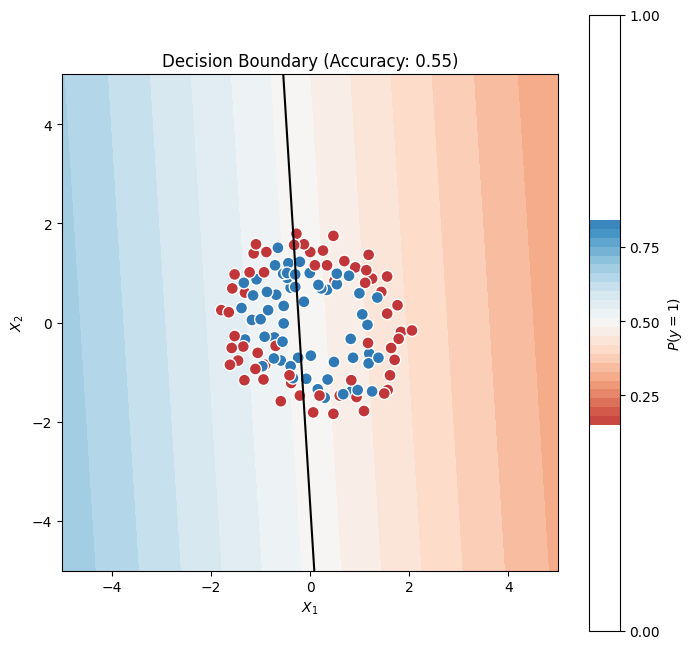

In [15]:
def print_boundary(model, X_test,y_test):
    xx, yy = np.mgrid[-10:10:.1, -10:10:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    preds = model.predict(X_test)
    acc = accuracy(y_test, preds)
    
    f, ax = plt.subplots(figsize=(8, 8))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])
    ax.scatter(X_test[:,0], X_test[:, 1], c=y_test[:], s=75, cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
    
    # Plot the decision boundary
    ax.contour(xx, yy, probs, levels=[0.5], colors='k')

    ax.set(aspect="equal", xlim=(-5, 5), ylim=(-5, 5),
           xlabel="$X_1$", ylabel="$X_2$",
           title=f"Decision Boundary (Accuracy: {acc:.2f})")

print_boundary(model2,X_std,y_std)

#### Logistic Regression  with L2 regularization

In [16]:
class L2_LogisticRegression:
    def sigmoid(self,z):
        sig = 1/(1+np.exp(-z))
        return sig
    
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    
    def fit(self,X,y,alpha=0.0001,iter=10000,lamda=0.1):
        weights,X = self.initialize(X)
        def loss_function(theta):
            z = dot(X,theta)
            loss_func_0 = y.T.dot(log(self.sigmoid(z)))
            loss_func_1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            loss_func_reg = (lamda * np.sum(np.square(theta[1:])))
            loss_func = -((loss_func_1 + loss_func_0))/len(y) + loss_func_reg
            return loss_func
        list_loss_func = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*(dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1))) + (lamda*weights))
            list_loss_func[i] = loss_function(weights)
        self.weights = weights
        return list_loss_func
    
    def predict(self,X):
        z = np.dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>=0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
    
    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        z = np.dot(X, self.weights)
        probs = self.sigmoid(z)
        return np.column_stack((1-probs, probs))


In [17]:
model3 = L2_LogisticRegression()
model3.fit(X_new,y_new)
y_pred= model3.predict(X_new)
probs = model3.predict_proba(X_new)
print(f" The model explains {accuracy(y_pred,y_new)} chance after transforming te features")

 The model explains 0.5508474576271186 chance after transforming te features


In [18]:
model4 = L2_LogisticRegression()
q= model4.fit(X_poly,y_new)
y_pred= model4.predict(X_poly)
probs = model4.predict_proba(X_poly)
print(f" The model explains {accuracy(y_pred,y_new)} chance after transforming regularizing the features")

 The model explains 0.7457627118644068 chance after transforming regularizing the features


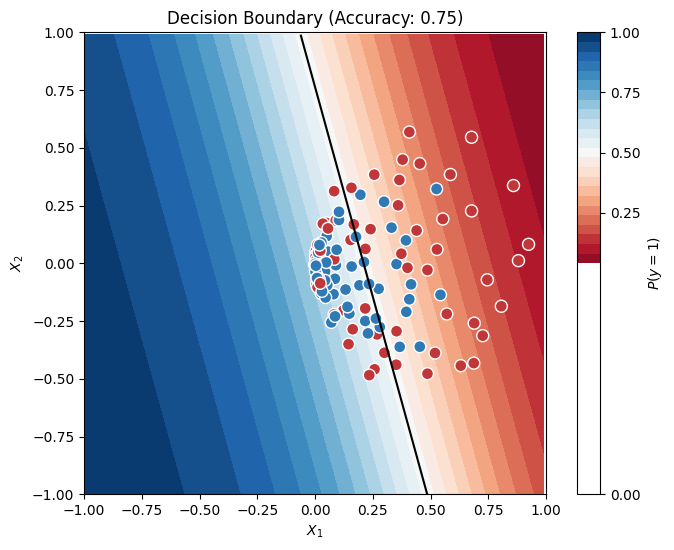

In [19]:
print_trans_dec_boundary(model4,X_poly,y_new)